# Complexity analysis

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [11]:
a = 1
M = 1

Narray = np.arange(10,110,10)

for N in Narray:
    
    m = M/N
    
    # P(r) = 3*r^3/(a^3)
    # r(P) = a(P/3)^(1/3)

    cdf_r = np.random.uniform(0,1,N)
    r = a*(cdf_r/3)**(1/3)

    # P(theta) = (1 - cos(theta))/2
    # theta(P) = cos^(-1)(1 - 2P)

    cdf_theta = np.random.uniform(0,1,N)
    theta = np.arccos(1 - 2*cdf_theta)

    phi = np.random.uniform(0,2*np.pi,N)
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta) 

    # open the file
    file = open('input%s.txt'% N, 'w')

    # write to the file
    file.write(f'{N}\n')
    file.write('0\n')
    for i in range(N):
        file.write(f'{m} {x[i]} {y[i]} {z[i]} {0} {0} {0}\n')

    # close the file
    file.close()

# Running the script

In [12]:
import subprocess

result = subprocess.run(['zsh', 'complexity.zsh'], stdout=subprocess.PIPE)

output = result.stdout.decode('utf-8')
print(output)

Measuring execution time for input10.txt...
Measuring execution time for input20.txt...
Measuring execution time for input30.txt...
Measuring execution time for input40.txt...
Measuring execution time for input50.txt...
Measuring execution time for input60.txt...
Measuring execution time for input70.txt...
Measuring execution time for input80.txt...
Measuring execution time for input90.txt...
Measuring execution time for input100.txt...
Execution times written to time.out



In [13]:
# Clearing the directory from the input and ouput files
import os

for i in range(10, 101):
    filename1 = f'input{i}.txt'
    filename2 = f'output{i}.out'
    if os.path.exists(filename1):
        os.remove(filename1)
    if os.path.exists(filename2):
        os.remove(filename2)

# Read data

In [14]:
# Open the .out file for reading
with open('time.out', 'r') as f:
    # Read the lines of the file into a list
    lines = f.readlines()

# Create an empty list to store the data from the second column
data = []

# Loop over the lines of the file
for line in lines:
    # Split each line into a list of words
    words = line.split()
    # Check if the list has at least two elements
    if len(words) >= 2:
        # Convert the second element to a float, replacing comma with point if necessary
        number = float(words[1].replace(',', '.'))
        # Append the number to the data list
        data.append(number)

# Convert the data list to a numpy array
times = np.array(data)

# Close the file
f.close()

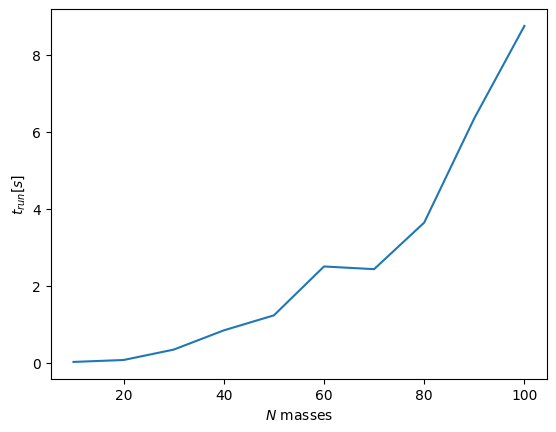

In [15]:
plt.plot(Narray, times)
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.show()

In [16]:
def fit_func(N, c, alpha): 
    
    return c*N**alpha

In [17]:
import scipy

params, _ = scipy.optimize.curve_fit(fit_func, Narray, times)

alpha = 3.076098936159209


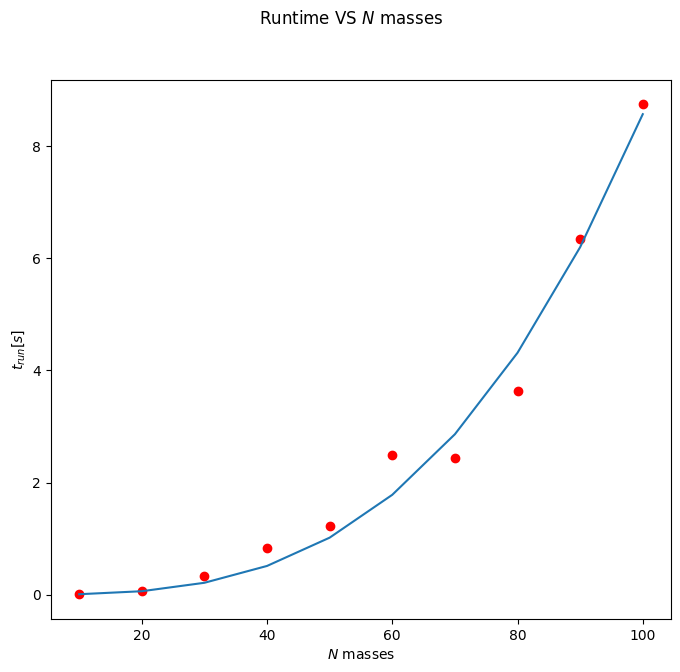

In [18]:
plt.figure(figsize = (8,7))

print("alpha =", params[1])

plt.scatter(Narray, times, c = 'r', label="results")
plt.plot(Narray, fit_func(Narray, params[0], params[1]), label="fit")
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.suptitle("Runtime VS $N$ masses")
plt.show()